# Размер случайного леса

###### Импорт необходимых библиотек

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

###### Импорт датасета и преобразование данных

In [2]:
df = pd.read_csv('abalone.csv', encoding='ascii')

In [3]:
df.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Замена строковых значений колонки "Пол" на вещественные числа
df['Sex'] = df['Sex'].apply({'F':-1, 'I':0, 'M':1}.get)
df.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# Разделение на признаки и целевую переменную
X = df.iloc[:, 0:-1]
y = df['Rings']

###### Обучение случайного леса на датасете при различном количестве деревьев

In [30]:
# Нахождение оценок качества для случайного леса при различных деревьях
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores_1 = []
for i in range(1, 51):
    score = cross_val_score(RandomForestRegressor(n_estimators=i, random_state=1), X, y, scoring='r2', cv=cv).mean()
    scores_1.append(score)

In [32]:
print('Количество деревьев, при котором оценка качества превышает 0.52 -', np.where(np.array(scores_1) > 0.52)[0][0] + 1)

Количество деревьев, при котором оценка качества превышает 0.52 - 21


In [24]:
# Альтернативный вариант нахождения с использованием отдельной функции r2_score
scores_2 = []
for i in range(1, 51):
    RandomForest = RandomForestRegressor(n_estimators=i,random_state=1)
    r2_scores = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        RandomForest.fit(X_train, y_train)
        r2_scores.append(r2_score(y_test, RandomForest.predict(X_test)))
    scores_2.append(np.array(r2_scores[:]).mean())
    r2_scores.clear()

In [34]:
print('Количество деревьев, при котором оценка качества превышает 0.52 -', np.where(np.array(scores_2) > 0.52)[0][0] + 1)

Количество деревьев, при котором оценка качества превышает 0.52 - 21


###### Зависимость качества случайного леса от количества деревьев

In [43]:
# Нахождение оценок качества для случайного леса при различных деревьях от 1 до 200 с шагом в 25
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores_new = []
n_trees = np.arange(1, 202, 25)
for tree in n_trees:
    score = cross_val_score(RandomForestRegressor(n_estimators=tree, random_state=1), X, y, scoring='r2', cv=cv).mean()
    scores_new.append(score)

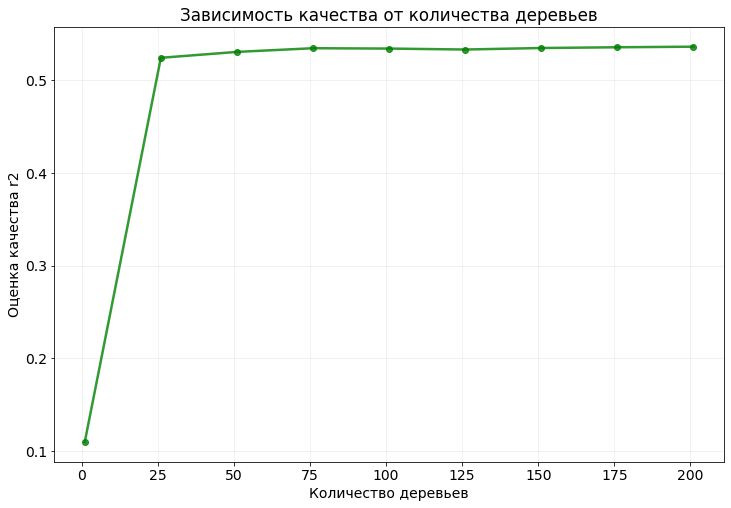

In [60]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size':14.0})
plt.plot(n_trees, scores_new, marker='o', lw=2.5, color='green', alpha=0.8)
plt.grid(alpha=0.2)
plt.xlabel('Количество деревьев')
plt.ylabel('Оценка качества r2')
plt.title('Зависимость качества от количества деревьев')
plt.show()

Таким образом, можно отметить, что, начиная с отметки в $26$ деревьев качество композиции существенным образом не меняется и остается приблизительно равным $0.53$.